**The Cats vs Dogs Dataset:-**

This dataset contains 25,000 images of dogs ands cats(12,500 from each class). We will create a new dataset containing three subsets: 
A training set with 1,000 samples of each class, A validation set with 500 samples each class and A test set with 500 samples of each class

In [1]:
import os , shutil

In [ ]:
# path to the directory where original dataset is un compressed
original_dataset_dir = r"C:\Users\Raju\Desktop\Project\cats_dogs\train1"

# Directory where we will store our smaller data
base_dir = r"C:\Users\Raju\Desktop\Project\cats_dogs"

# Direstories for the training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with training "cat and dog" pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with validation "cat and dog" pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with test "cat and dog" pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [6]:
# Copies the first 1,000 cat images to "train_cats_dir" from original dataset

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copies the next 500 cat images to "validation_cats_dir"

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copies the next 500 cat image to "test_cats_dir"

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copies the first 1,000 dog images  to "train_dogs_dir" from original dataset

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# copies the next 500 dog images in "validation_dogs_dir"

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# copies the next 500 dog images in "test_dogs_dir"

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
# As a sanity check, let's count how many pictures are in each training splits

print('Total training cat images:-',len(os.listdir(train_cats_dir)))
print('Total validation cat images:-', len(os.listdir(validation_cats_dir)))
print('Total test cat images:-',len(os.listdir(test_cats_dir)))
print('Total training dog images:-', len(os.listdir(train_dogs_dir)))
print('Total validation dog images:-', len(os.listdir(validation_dogs_dir)))
print('Total test dog images:-', len(os.listdir(test_dogs_dir)))

Total training cat images:- 1000
Total validation cat images:- 500
Total test cat images:- 500
Total training dog images:- 1000
Total validation dog images:- 500
Total test dog images:- 500


Since we are dealing with binary image classification (cats vs dogs), we'll make our network larger accordingly, It will have 4 **" Conv2D + MaxPooling2D "** stage. This serves both to augment the capacity of the network and further reduce the size of the feature maps, so that they are not overly large when you reach the **"Flatten"** layer.
Here we starts from inputs of size (150 x 150) (a somewhat arbitrary choice), we end up with feature maps of size (7 x 7) just before the flatten layer. we are dealing with a binary classification problem, we'll end the network with single unit (a Dense layer of size 1) and a **"sigmoid"** activation.
This will encode the probability that the network is looking at one class or the other

In [10]:
from tensorflow.keras import layers
from tensorflow.keras import models

# Neural Network
model=models.Sequential()
# Conv2D + MaxPooling2D layers (convnet)
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
# Flattening the layer (converting 2D into 1D)
model.add(layers.Flatten())
# Dense layer
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # sigmoid activation because the problem is binary classification

Let's look at how dimensions of the feature maps changes with every successive layers

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)      

For **compilation** step, we'll go with **RMSprop** optimizer, and because we ended the network with a single **'sigmoid'** unit, we'll use binary crossentropy as loss

In [12]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['accuracy'])

**Model preprocessing**

As we know, data should be formatted into appropriately preprocessed floating-point tensors before being fed into the network, currently data is in drive as, JPEG files, So the steps for getting into the network are roughly as follows

1. Read the picture files
2. Decode the JPEG content to RGB grid of pixels
3. Convert these into floating-point tensors
4. Rescale the pixels values (between 0 and 255) to the (0,1) interval as we know, Neural networks prefer to deal with small input values

Fortunately, keras has utilities to take care of these steps automatically, keras has a module with image-processing helper tools located as **keras.preprocessing.image**.
In particular, It contains the class **ImageDataGenerator** which lets us quickly set up python generators that can automatically turn image file on disc into batches of preprocessed tensors.

In [13]:
# Using 'ImageDataGenerator' to read images from directories

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,  # Target directory
    target_size=(150, 150),  # Resize all image to (150,150)
    batch_size=20,
    class_mode='binary'
)  # Because we are dealing with binary classification we need binary labels

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


let's look at output of one of these generators:
Note: that the generator yields these batches indefinitely over the image in the target folder, For this reason we need to break the iteration loop at some point

In [14]:
for data_batch, label_batch in train_generator:
    print('Data batch size:-', data_batch.shape)
    print('Labels batch size:-', label_batch.shape)
    break

Data batch size:- (20, 150, 150, 3)
Labels batch size:- (20,)


let's fit the model to the data using the generator, We will do so using **"fit_generator"** method which equivalent of **"fit"** for data generators like this one.
It's expects as its first argument a python generator that yields batches of inputs and target indefinitely.

Because the data is being generated endlessly the keras model need to know how many sample to draw from the generator before declaring an epochs over. This is the role of the **"steps_per_epoch"** argument: After having drawn "steps_per_epochs" batches from the generator the fitting process will go to the next epoch.
In this case the batches are 20 samples, so it will take 100 batches until you see your target of 2000 samples.
When using **"fit_generator"**  we can pass **'validation_data'** argument, much as with **'fit'** method and also the **'validation_steps'** arguments, which tells the process how many batches to drawn from the validation generator for evaluation

In [15]:
# fittting the model using a batch generator:-

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 154s 2s/step - loss: 0.6937 - accuracy: 0.5180 - val_loss: 0.6753 - val_accuracy: 0.6340
Epoch 2/30
100/100 [==============================] - 135s 1s/step - loss: 0.6616 - accuracy: 0.6070 - val_loss: 0.6538 - val_accuracy: 0.6190
Epoch 3/30
100/100 [==============================] - 134s 1s/step - loss: 0.6070 - accuracy: 0.6880 - val_loss: 0.6153 - val_accuracy: 0.6590
Epoch 4/30
100/100 [==============================] - 135s 1s/step - loss: 0.5712 - accuracy: 0.7065 - val_loss: 0.7002 - val_accuracy: 0.5940
Epoch 5/30
100/100 [==============================] - 132s 1s/step - loss: 0.5354 - accuracy: 0.7215 - val_loss: 0.6465 - val_accuracy: 0.6300
Epoch 6/30
100/100 [==============================] - 132s 1s/step - loss: 0.4999 - accuracy: 0.7580 - val_loss: 0.6001 - val_accuracy: 0.6800
Epoch 7/30
100/100 [==============================] - 131s 1s/step

In [16]:
# saving the model

model.save('cats_and_dogs_small_1.h5')

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

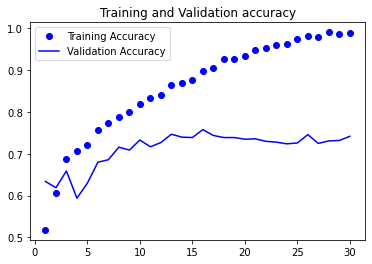

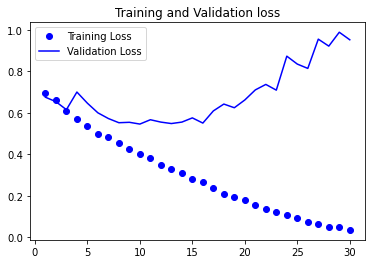

In [30]:
# Displaying curves of loss and accuracy during training

import matplotlib.pyplot as plt
%matplotlib inline

train_acc= history.history['accuracy']
train_loss=history.history['loss']
val_acc=history.history['val_accuracy']
val_loss=history.history['val_loss']

epochs=range(1, len(train_acc)+1)

plt.plot(epochs, train_acc,'bo', label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,train_loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

These plots are characteristic of overfitting. The training accuracy increases linearly over time until it reaches nearly 100% whereas the validation accuracy stalls at 70-72% .
Because we have relatively few training samples (2000), overfitting will be our number-one concern, we already know about a number of techniques that can help mitigate the overfitting, such as **Dropout** and **weight decaying** (L2 regularization).
We are now going to work with a new one, specific to computer vision and used almost universally. when processing images with deep-learning models **"Data Augmentation"**

**Using data augmentation:-**

Overfitting is cause by having too few samples to learn from, Data augmentation takes the approach of generating more training data from the existing training samples by augmenting the sample via a number of random transformations that yields believable looking images. The goal is that at training time our model will never see the same picture twice.

In keras , this can be done by configuring a number of random transformation to be performed on the images read by the **"ImageDataGenerator"** instance

In [31]:
# setting up a data augmentation configuration via 'ImageDataGenerator'

datagen= ImageDataGenerator(rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True,
                           fill_mode='nearest')

These are just few of the options available (for more see the keras documentation)

**"rotation_range"** is a value in degrees (0-180), a range within which to randomly rotate the pictures

**"width_shift"** and **"height_shift"** are range (as a fraction of total width or height ) within which to randomly translate pictures vertically or horizontally.

**"shear_range"** is for randomly applying shearing transformations.

**"zoom_range"** is for randomly zooming inside picture.

**"horizontal_flip"** is for randomly flipping half the images horizontally-relevant when there are no assumptions of horizontal asymmetry( for example real-world picture).

**"fill_mode"** is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.


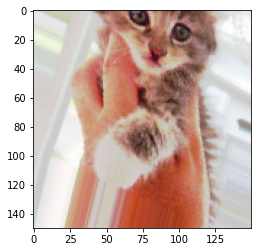

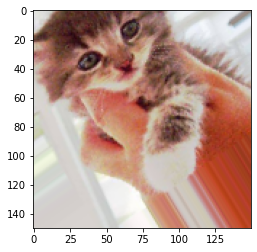

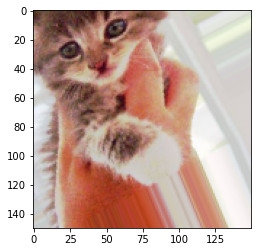

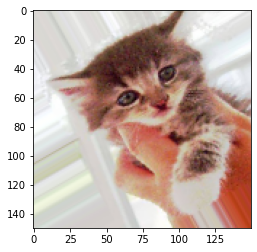

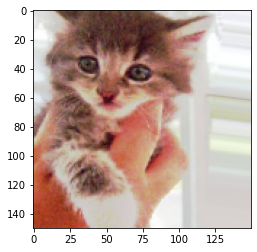

In [33]:
# displaying some randomly augmented training images

# module with image-preprocessing utilities
from tensorflow.keras.preprocessing import image

fnames = [
    os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)
]

img_path = fnames[3]  # choose one image to augment

img = image.load_img(img_path,
                     target_size=(150, 150))  # read the image and resize it

# converts it to a numpy array with shape (150,150,3)
x = image.img_to_array(img)

x = x.reshape((1, ) + x.shape)  # reshape it to (1,150,150,3)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 5 == 0:
        break  # Loops indefinitely, so we need to break the loop at some point!

plt.show()

If we train a new network using this data-augmentation configuration. the network will never see the same input twice but the inputs it sees are still heavily intercorrelated, we can't produce new information, we can only remix existing information. This may not be enough to completely get rid of overfitting, To further fight overfitting we'll also add a **"Dropout"** layer to your model right before the Densely connected classification

In [34]:
# Defining a new convnet that induces 'Dropout'

model = models.Sequential()
model.add(
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compiling the model

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [47]:
# Let's train the model using Data-Augmentation and Dropout

train_datagen_aug = ImageDataGenerator(rescale=1. / 255,
                                       rotation_range=40,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                      fill_mode='nearest')

# Note that the Validation dataset need not need Augmentation
test_datagen_aug = ImageDataGenerator(rescale=1. / 255)

train_generator_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                            target_size=(150, 150),
                                                            batch_size=20,
                                                            class_mode='binary')

validation_generator_aug = test_datagen_aug.flow_from_directory(validation_dir,
                                                                target_size=(150, 150),
                                                                batch_size=32,
                                                                class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [48]:
history = model.fit_generator(train_generator_aug,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator_aug,
                              validation_steps=50)

Epoch 1/100
100/100 [==============================] - 146s 1s/step - loss: 0.6456 - accuracy: 0.6250 - val_loss: 0.6310 - val_accuracy: 0.6270
Epoch 2/100
100/100 [==============================] - 146s 1s/step - loss: 0.6330 - accuracy: 0.6375 - val_loss: 0.6276 - val_accuracy: 0.6320
Epoch 3/100
100/100 [==============================] - 144s 1s/step - loss: 0.6187 - accuracy: 0.6500 - val_loss: 0.6319 - val_accuracy: 0.6320
Epoch 4/100
100/100 [==============================] - 144s 1s/step - loss: 0.6131 - accuracy: 0.6695 - val_loss: 0.5731 - val_accuracy: 0.6840
Epoch 5/100
100/100 [==============================] - 143s 1s/step - loss: 0.6144 - accuracy: 0.6585 - val_loss: 0.5605 - val_accuracy: 0.7000
Epoch 6/100
100/100 [==============================] - 143s 1s/step - loss: 0.5900 - accuracy: 0.6745 - val_loss: 0.5671 - val_accuracy: 0.7010
Epoch 7/100
100/100 [==============================] - 138s 1s/step - loss: 0.5883 - accuracy: 0.6860 - val_loss: 0.5403 - val_accuracy:

100/100 [==============================] - 142s 1s/step - loss: 0.5636 - accuracy: 0.7025 - val_loss: 0.5172 - val_accuracy: 0.7400
Epoch 18/100
100/100 [==============================] - 138s 1s/step - loss: 0.5293 - accuracy: 0.7300 - val_loss: 0.4972 - val_accuracy: 0.7520
Epoch 19/100
100/100 [==============================] - 138s 1s/step - loss: 0.5359 - accuracy: 0.7290 - val_loss: 0.4981 - val_accuracy: 0.7290
Epoch 20/100
100/100 [==============================] - 138s 1s/step - loss: 0.5338 - accuracy: 0.7290 - val_loss: 0.4980 - val_accuracy: 0.7510
Epoch 21/100
100/100 [==============================] - 138s 1s/step - loss: 0.5231 - accuracy: 0.7315 - val_loss: 0.4915 - val_accuracy: 0.7590
Epoch 22/100
100/100 [==============================] - 139s 1s/step - loss: 0.5264 - accuracy: 0.7220 - val_loss: 0.4961 - val_accuracy: 0.7350
Epoch 23/100
100/100 [==============================] - 138s 1s/step - loss: 0.5210 - accuracy: 0.7405 - val_loss: 0.5026 - val_accuracy: 0.742

100/100 [==============================] - 138s 1s/step - loss: 0.4839 - accuracy: 0.7620 - val_loss: 0.5576 - val_accuracy: 0.7280
Epoch 35/100
100/100 [==============================] - 140s 1s/step - loss: 0.4778 - accuracy: 0.7625 - val_loss: 0.4845 - val_accuracy: 0.7530
Epoch 36/100
100/100 [==============================] - 138s 1s/step - loss: 0.4796 - accuracy: 0.7815 - val_loss: 0.4580 - val_accuracy: 0.7710
Epoch 37/100
100/100 [==============================] - 137s 1s/step - loss: 0.4720 - accuracy: 0.7740 - val_loss: 0.4767 - val_accuracy: 0.7520
Epoch 38/100
100/100 [==============================] - 138s 1s/step - loss: 0.4755 - accuracy: 0.7610 - val_loss: 0.4521 - val_accuracy: 0.7910
Epoch 39/100
100/100 [==============================] - 139s 1s/step - loss: 0.4832 - accuracy: 0.7630 - val_loss: 0.4667 - val_accuracy: 0.7650
Epoch 40/100
100/100 [==============================] - 137s 1s/step - loss: 0.4747 - accuracy: 0.7680 - val_loss: 0.4989 - val_accuracy: 0.745

100/100 [==============================] - 139s 1s/step - loss: 0.4625 - accuracy: 0.7850 - val_loss: 0.5807 - val_accuracy: 0.7220
Epoch 52/100
100/100 [==============================] - 137s 1s/step - loss: 0.4460 - accuracy: 0.7985 - val_loss: 0.4824 - val_accuracy: 0.7800
Epoch 53/100
100/100 [==============================] - 137s 1s/step - loss: 0.4617 - accuracy: 0.7790 - val_loss: 0.4575 - val_accuracy: 0.7730
Epoch 54/100
100/100 [==============================] - 136s 1s/step - loss: 0.4443 - accuracy: 0.7910 - val_loss: 0.4699 - val_accuracy: 0.7830
Epoch 55/100
100/100 [==============================] - 136s 1s/step - loss: 0.4357 - accuracy: 0.7945 - val_loss: 0.4358 - val_accuracy: 0.7970
Epoch 56/100
100/100 [==============================] - 137s 1s/step - loss: 0.4273 - accuracy: 0.8045 - val_loss: 0.4796 - val_accuracy: 0.7760
Epoch 57/100
100/100 [==============================] - 137s 1s/step - loss: 0.4308 - accuracy: 0.7985 - val_loss: 0.4740 - val_accuracy: 0.785

100/100 [==============================] - 137s 1s/step - loss: 0.4193 - accuracy: 0.8120 - val_loss: 0.4290 - val_accuracy: 0.7920
Epoch 69/100
100/100 [==============================] - 136s 1s/step - loss: 0.3961 - accuracy: 0.8120 - val_loss: 0.4167 - val_accuracy: 0.8100
Epoch 70/100
100/100 [==============================] - 141s 1s/step - loss: 0.4163 - accuracy: 0.8100 - val_loss: 0.4350 - val_accuracy: 0.8110
Epoch 71/100
100/100 [==============================] - 142s 1s/step - loss: 0.4202 - accuracy: 0.7985 - val_loss: 0.4072 - val_accuracy: 0.8140
Epoch 72/100
100/100 [==============================] - 143s 1s/step - loss: 0.4040 - accuracy: 0.8215 - val_loss: 0.4536 - val_accuracy: 0.7850
Epoch 73/100
100/100 [==============================] - 142s 1s/step - loss: 0.4147 - accuracy: 0.8090 - val_loss: 0.4113 - val_accuracy: 0.8120
Epoch 74/100
100/100 [==============================] - 142s 1s/step - loss: 0.4190 - accuracy: 0.8075 - val_loss: 0.4070 - val_accuracy: 0.827

100/100 [==============================] - 142s 1s/step - loss: 0.4050 - accuracy: 0.8170 - val_loss: 0.4542 - val_accuracy: 0.7830
Epoch 86/100
100/100 [==============================] - 142s 1s/step - loss: 0.3806 - accuracy: 0.8290 - val_loss: 0.3780 - val_accuracy: 0.8360
Epoch 87/100
100/100 [==============================] - 141s 1s/step - loss: 0.3838 - accuracy: 0.8260 - val_loss: 0.4443 - val_accuracy: 0.8030
Epoch 88/100
100/100 [==============================] - 142s 1s/step - loss: 0.3748 - accuracy: 0.8265 - val_loss: 0.4302 - val_accuracy: 0.8040
Epoch 89/100
100/100 [==============================] - 142s 1s/step - loss: 0.3786 - accuracy: 0.8330 - val_loss: 0.3920 - val_accuracy: 0.8240
Epoch 90/100
100/100 [==============================] - 142s 1s/step - loss: 0.3710 - accuracy: 0.8310 - val_loss: 0.5732 - val_accuracy: 0.7720
Epoch 91/100
100/100 [==============================] - 142s 1s/step - loss: 0.3711 - accuracy: 0.8405 - val_loss: 0.4769 - val_accuracy: 0.789

In [49]:
model.save('cats_and_dogs_small_2.h5')

In [50]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

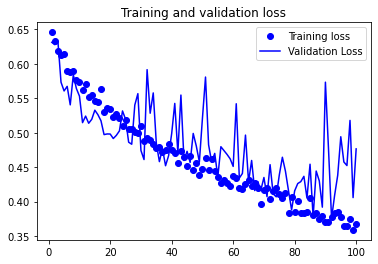

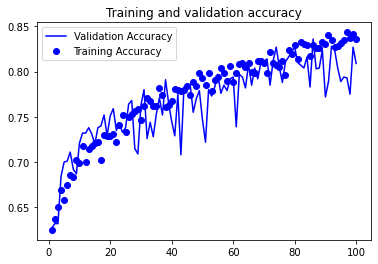

In [52]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.figure()
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

By using regularization techniques even further, and by tunning the network's parameters (such as the number of filter per convolution layer, or the number of layers in the networks), you might able to get accuracy up to 85-87%, But it would prove difficult to go any further just by training our own convnet from scratch, because we have so little data to work with.
As a next step to improve our accuracy on this problem, we'll have to use a pretrained model

 **Using a Pretrained Model**

A common and highly effective approach to deep learning on small image datasets is to use a **pre-trained** network.
A **pre-trained** network is a saved network that was previously trained on a large dataset, typically on a large scale **image-classification** task.

We'll use the **VGG16** Architecture, developed by **Karen Simonyan and Andrew Zisserman** in 2014.

There are two ways to use a pre-trained network **"Feature extraction"** and **"Fine-tunnig"**


**Feature Extraction:-**

